In [ ]:
%whos

Interactive namespace is empty.


In [ ]:
!nproc

12


In [ ]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            83Gi       1.2Gi        78Gi       1.0Mi       3.6Gi        81Gi
Swap:             0B          0B          0B


In [ ]:
!nvidia-smi

Thu Jan  9 21:13:23 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              45W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

# GPU Verification

In [ ]:
!nvidia-smi

<br/>

<br/>

<br/>

In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np

# XGBoost Verification

In [ ]:
xgb.__version__

In [ ]:
XGBRegressor(device='cuda', objective='reg:squarederror', max_depth=10, learning_rate=0.1, n_estimators=250, enable_categorical=True, verbosity=0)

DEFAULT_N_ESTIMATORS = 100 # xgboost.sklearn.DEFAULT_N_ESTIMATORS

In [ ]:
# create a pandas dataframe with 3 columns of 100 random float values
df = pd.DataFrame(np.random.rand(100, 3), columns=['y', 'x1', 'x2'])
X = df.drop(columns=['y'])
y = df['y']

param_checker = xgb.XGBRegressor()
param_checker.fit(X, y)

In [ ]:
default_values = param_checker.__dict__
default_values['device'], default_values['objective'], default_values['max_depth'], default_values['learning_rate'], default_values['n_estimators'], default_values['enable_categorical'], default_values['verbosity']

In [ ]:
default_values = xgb.XGBRegressor().__dict__

default_values['device'], default_values['objective'], default_values['max_depth'], default_values['learning_rate'], default_values['n_estimators'], default_values['enable_categorical'], default_values['verbosity']

In [ ]:
# FROM engg approved notebook:
XGBRegressor(device='cuda', objective='reg:squarederror', max_depth=10, learning_rate=0.1, n_estimators=250, enable_categorical=True, verbosity=0)

In [ ]:

XGBRegressor(objective='reg:squarederror', max_depth=10, learning_rate=0.1, n_estimators=250, enable_categorical=True, verbosity=0)

# defaults

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

# NVIDA RAPIDS Verification

In [ ]:
# 0. Enable NVIDIA GPU in Colab
# a. Runtime OR Resources Tool > Change runtime type

In [ ]:
# 1. verify GPU and CUDA
# a. nvidia-smi
# b. nvcc --version

In [ ]:
# 2. verify NVIDIA RAPIDS cuDF
# a. !pip freeze | grep cudf
# b. %load_ext cudf.pandas
# c. import pandas as pd
# d. %whos

In [ ]:
%load_ext cudf.pandas

In [ ]:
import pandas as pd

In [ ]:
# 3. verify lastest XGBoost version
# a. get latest version - rapids.ai
# b. pip freeze | grep xgboost
# c. import xgboost as xgb ; xgb.__version__

In [ ]:
import xgboost as xgb ; xgb.__version__

'2.1.3'

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

# City of Chicago Taxi Trips Data
##### Dowload Data From Here:
https://data.cityofchicago.org/Transportation/Taxi-Trips-2013-2023-/wrvz-psew/data_preview


In [ ]:
!cp /content/drive/MyDrive/Taxi_Trips__2013-2023__20241218.csv .

In [ ]:
!wc -l Taxi_Trips__2013-2023__20241218.csv

1972429 Taxi_Trips__2013-2023__20241218.csv


In [ ]:
# xgb_device = "cpu"
xgb_device = "cuda"
xgb_device

'cuda'

In [ ]:
import pandas as pd
import numpy as np
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

<br/>

<br/>

<br/>

# CSV

In [ ]:
%%time

start = time()
# RAPIDS OFF  - 22.04
# RAPIDS A100 - 0.408 (x33) / 1.95 ()

df = pd.read_csv('Taxi_Trips__2013-2023__20241218.csv')  # read in data

CPU times: user 382 ms, sys: 247 ms, total: 629 ms
Wall time: 839 ms


In [ ]:
%%time
# RAPIDS OFF  - 22.04
# RAPIDS A100 - 0.051

df = df.rename(columns={'Trip Total': 'trip_ttl'})  # abbreviate target column name

df = df[df["trip_ttl"]>0]

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

X = df.drop(columns=["trip_ttl"])
y = df["trip_ttl"]

CPU times: user 772 ms, sys: 114 ms, total: 886 ms
Wall time: 1.27 s


In [ ]:
%%time

start = time()
# RAPIDS OFF  - 22.04
# RAPIDS A100 - 0.408 (x33) / 1.95 (x11)

df = pd.read_csv('Taxi_Trips__2013-2023__20241218.csv')  # read in data

df = df.rename(columns={'Trip Total': 'trip_ttl'})  # abbreviate target column name

df = df[df["trip_ttl"]>0]

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

X = df.drop(columns=["trip_ttl"])
y = df["trip_ttl"]

time() - start

CPU times: user 334 ms, sys: 75.2 ms, total: 409 ms
Wall time: 389 ms


0.3886454105377197

In [ ]:
len(df)

1971068

<br/>

<br/>

<br/>

<br/>

# Mean Model

In [ ]:
y.mean().round(2).item()

17.58

In [ ]:
%%time

# RAPIDS OFF  - 1.22
# RAPIDS A100 - 0.724

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mean_fold_results = {"avg":[], "mse": [], "rmse": [], "mae": [], "r2": [], "max_err": []}

for fold, (train_index, test_index) in enumerate(kf.split(y)):

  # get folds
  y_train, y_true = y[train_index], y[test_index]

  # "mean model"
  y_pred = y_train.mean()
  mean_fold_results["avg"].append(y_pred)

  # calculate metrics
  mse = ((y_true - y_pred) ** 2).mean()
  mean_fold_results["mse"].append(mse)
  mean_fold_results["rmse"].append(mse  ** 0.5)
  mae = (y_true - y_pred).abs().mean()
  mean_fold_results["mae"].append(mae)
  ss_residual = ((y_true - y_pred) ** 2).sum()
  ss_total = ((y_true - y_true.mean()) ** 2).sum()
  r_squared = 1 - (ss_residual / ss_total)
  mean_fold_results["r2"].append(1 - (ss_residual / ss_total))
  mean_fold_results["max_err"].append((y_true - y_pred).abs().max())

mean_fold_results_df = pd.DataFrame(mean_fold_results)
mean_fold_results_df

CPU times: user 726 ms, sys: 210 ms, total: 936 ms
Wall time: 1.1 s


,avg,mse,rmse,mae,r2,max_err
0,17.532107,9141.875107,95.613153,13.542402,-6.023739e-06,9782.767893
1,17.617675,7639.707685,87.405421,13.250784,-4.884284e-06,9882.682325
2,17.616017,6383.971635,79.899760,13.259757,-5.354304e-06,9034.833983
3,17.549724,8855.465930,94.103485,13.516449,-2.426406e-06,9957.770276
4,17.579680,8401.307659,91.658647,13.400753,-1.217141e-09,9682.670320


In [ ]:
mean_results_df = pd.DataFrame({'model': 'mean',**mean_fold_results_df.drop(columns=['max_err']).mean(), 'max_err': mean_fold_results_df['max_err'].max()}, index=[0])
mean_results_df.round(2)

,model,avg,mse,rmse,mae,r2,max_err
0,mean,17.58,8084.47,89.74,13.39,-0.0,9957.77


<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

# Median Model

In [ ]:
y.median()

9.75

In [ ]:
%%time
# RAPIDS OFF  - 0.959
# RAPIDS A100 -

median_fold_results = {"avg":[], "mse": [], "rmse": [], "mae": [], "r2": [], "max_err": []}
for fold, (train_index, test_index) in enumerate(kf.split(y)):

  # get folds
  y_train, y_true = y[train_index], y[test_index]

  # "median model"
  y_pred = y_train.median()
  median_fold_results["avg"].append(y_pred)

  # calculate metrics
  mse = ((y_true - y_pred) ** 2).mean()
  median_fold_results["mse"].append(mse)
  median_fold_results["rmse"].append(mse ** 0.5)
  mae = (y_true - y_pred).abs().mean()
  median_fold_results["mae"].append(mae)
  ss_residual = ((y_true - y_pred) ** 2).sum()
  ss_total = ((y_true - y_true.mean()) ** 2).sum()
  r_squared = 1 - (ss_residual / ss_total)
  median_fold_results["r2"].append(1 - (ss_residual / ss_total))
  median_fold_results["max_err"].append((y_true - y_pred).abs().max())

median_fold_results_df = pd.DataFrame(median_fold_results)

CPU times: user 615 ms, sys: 125 ms, total: 740 ms
Wall time: 704 ms


In [ ]:
median_results_df = pd.DataFrame({'model': 'median', **median_fold_results_df.drop(columns=['max_err']).mean(), 'max_err': median_fold_results_df['max_err'].max()}, index=[0])
pd.concat([mean_results_df, median_results_df]).round(2)

,model,avg,mse,rmse,mae,r2,max_err
0,mean,17.58,8084.47,89.74,13.39,-0.00,9957.77
0,median,9.75,8145.75,90.08,10.52,-0.01,9965.57


<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

# Naive XGBoost
##### Min Feature Engineering and no Hyperparameter Tuning

In [ ]:
%%time

# RAPIDS OFF  - 48.2, 40.5
# RAPIDS A100 - 0.597 (x68)

df = pd.read_csv('Taxi_Trips__2013-2023__20241218.csv')  # read in data

df = df.rename(columns={'Trip Total': 'trip_ttl'})  # abbreviate target column name

df = df[df["trip_ttl"]>0]

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df = df.drop(columns=["Fare", "Tips", "Tolls", "Extras"])
df = df.drop(columns=["Trip ID", "Taxi ID", "Pickup Centroid Location", "Dropoff Centroid  Location", "Payment Type", "Company"])

df["Trip Start Timestamp"] = pd.to_datetime(df["Trip Start Timestamp"], format="%m/%d/%Y %I:%M:%S %p")
df["Trip End Timestamp"] = pd.to_datetime(df["Trip End Timestamp"], format="%m/%d/%Y %I:%M:%S %p")
df["Trip Start Timestamp"] = (df["Trip Start Timestamp"] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
df["Trip End Timestamp"] = (df["Trip End Timestamp"] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

y = df["trip_ttl"]
X = df.drop(columns=["trip_ttl"])

CPU times: user 479 ms, sys: 98.1 ms, total: 577 ms
Wall time: 612 ms


In [ ]:
%%time

# RAPIDS OFF  - 117.26
# RAPIDS A100 - 6.66 (x17), 5.35

import xgboost as xgb

xgb_naive_fold_results = {"avg": [], "mse": [], "rmse": [], "mae": [], "r2": [], "max_err": []}

for fold, (train_index, test_index) in enumerate(KFold(n_splits=5, shuffle=True, random_state=42).split(df)):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # train
  xgb_model = xgb.XGBRegressor(device=xgb_device)

  xgb_model.fit(X_train, y_train)
  y_pred = xgb_model.predict(X_test)
  xgb_naive_fold_results["avg"].append(y_pred.mean())

  # metrics
  mse = ((y_test - y_pred) ** 2).mean()
  xgb_naive_fold_results["mse"].append(mse)
  xgb_naive_fold_results["rmse"].append(mse ** 0.5)
  mae = (y_test - y_pred).abs().mean()
  xgb_naive_fold_results["mae"].append(mae)
  ss_residual = ((y_test - y_pred) ** 2).sum()
  ss_total = ((y_test - y_test.mean()) ** 2).sum()
  r_squared = 1 - (ss_residual / ss_total)
  xgb_naive_fold_results["r2"].append(1 - (ss_residual / ss_total))
  xgb_naive_fold_results["max_err"].append((y_test - y_pred).abs().max())

CPU times: user 5.92 s, sys: 1.45 s, total: 7.37 s
Wall time: 6.91 s


### All Naïve Results

In [ ]:
xgb_naïve_fold_results_df = pd.DataFrame(xgb_naive_fold_results)
xgb_naïve_results_df = pd.DataFrame({'model': 'xgb_naïve',**xgb_naïve_fold_results_df.drop(columns=['max_err']).mean(), 'max_err': xgb_naïve_fold_results_df['max_err'].max()}, index=[0])
all_results = pd.concat([mean_results_df, median_results_df, xgb_naïve_results_df]).sort_values(by=["mae", "mse", "rmse", "r2", "max_err"], ascending=[True, True, True, False, True])
all_results.round(2)

,model,avg,mse,rmse,mae,r2,max_err
0,xgb_naïve,17.58,7055.60,83.87,5.16,0.13,9788.08
0,median,9.75,8145.75,90.08,10.52,-0.01,9965.57
0,mean,17.58,8084.47,89.74,13.39,-0.00,9957.77


<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

### Feature Importance

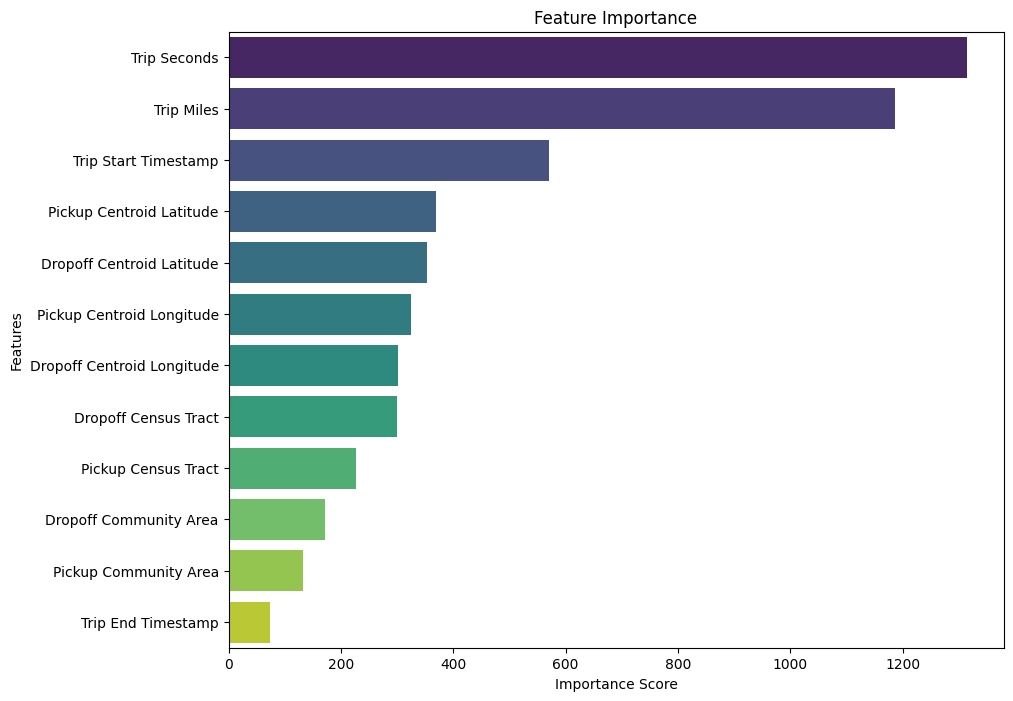

In [ ]:
booster = xgb_model.get_booster()
importance = booster.get_score(importance_type='weight')  # You can also use 'gain', 'cover', etc.

# Convert to DataFrame
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette="viridis", dodge=False, legend=False)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

<br/>

<br/>

<br/>

# XGBoost + Feature Engineering

In [ ]:
%%time

# RAPIDS OFF  - 20.28
# RAPIDS A100 - 0.40 (x50)

df = pd.read_csv('Taxi_Trips__2013-2023__20241218.csv')  # read in data

df = df.rename(columns={'Trip Total': 'trip_ttl'})  # abbreviate target column name

df = df.drop(columns=["Fare", "Tips", "Tolls", "Extras"])

df = df.drop(columns=["Trip ID", "Taxi ID"])

df["Trip Start Timestamp"] = pd.to_datetime(df["Trip Start Timestamp"], format="%m/%d/%Y %I:%M:%S %p")
df["Trip End Timestamp"] = pd.to_datetime(df["Trip End Timestamp"], format="%m/%d/%Y %I:%M:%S %p")

df = df[df["trip_ttl"]>0]

CPU times: user 348 ms, sys: 72.7 ms, total: 421 ms
Wall time: 400 ms


### Feature Classification

In [ ]:
%%time

# RAPIDS OFF  - 1.75
# RAPIDS A100 - 0.0247 (x70)

df.nunique().sort_values()

CPU times: user 17.3 ms, sys: 1.42 ms, total: 18.8 ms
Wall time: 25.6 ms


,0
Payment Type,9
Company,42
Pickup Community Area,77
Dropoff Community Area,77
Pickup Census Tract,292
Pickup Centroid Latitude,366
Pickup Centroid Longitude,366
Pickup Centroid Location,369
Dropoff Centroid Latitude,475
Dropoff Centroid Longitude,475


In [ ]:
%%time

# RAPIDS OFF  - 0.31
# RAPIDS A100 - 0.0048 (x62)

target = ["trip_ttl"]
assert len(df[target]) > 0

num_cols = ["Pickup Centroid Latitude", "Pickup Centroid Longitude", "Dropoff Centroid Latitude", "Dropoff Centroid Longitude", "Trip Miles", "Trip Seconds", "Trip Start Timestamp", "Trip End Timestamp"]
assert len(df[num_cols]) > 0

cat_cols = list(set(df.columns) - set(target + num_cols))
assert len(df[cat_cols]) > 0
print(cat_cols)

assert len(df.columns) == len(target) + len(num_cols) + len(cat_cols)
assert len(target + num_cols + cat_cols) == len(set(target + num_cols + cat_cols))

['Payment Type', 'Company', 'Dropoff Community Area', 'Pickup Community Area', 'Pickup Centroid Location', 'Pickup Census Tract', 'Dropoff Centroid  Location', 'Dropoff Census Tract']
CPU times: user 3.89 ms, sys: 155 µs, total: 4.04 ms
Wall time: 3.33 ms


### Impute

In [ ]:
%%time

# RAPIDS OFF  - 3.33
# RAPIDS A100 - 4.04

# impute num cols
for col in num_cols:
  df[col] = df[col].fillna(df[col].mean())

#impute cat cols
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

CPU times: user 3.68 s, sys: 986 ms, total: 4.66 s
Wall time: 4.48 s


### Outlier Analysis

In [ ]:
%%time

# RAPIDS OFF  - 2.51
# RAPIDS A100 - 0.02 (x125)
df.sort_values(["trip_ttl", "Trip Seconds", "Trip Miles"], ascending=False)[["trip_ttl", "Trip Seconds", "Trip Miles", "Payment Type"]]

CPU times: user 15.8 ms, sys: 2.96 ms, total: 18.8 ms
Wall time: 16 ms


,trip_ttl,Trip Seconds,Trip Miles,Payment Type
1000042,9975.32,1500.0,0.00,Cash
171827,9900.30,1158.0,0.00,Cash
1664624,9800.30,1074.0,0.00,Cash
285324,9746.85,1080.0,57.90,Credit Card
161771,9700.25,1007.0,0.00,Cash
...,...,...,...,...
1017382,0.01,40.0,0.00,Cash
1038230,0.01,38.0,0.09,Cash
1037939,0.01,38.0,0.01,Cash
1227769,0.01,36.0,0.04,Cash


In [ ]:
%%time

# RAPIDS OFF  - 0.216
# RAPIDS A100 - 0.021

df = df[(df['Trip Seconds'] * df['Trip Miles']) > 0]

CPU times: user 11.1 ms, sys: 3.65 ms, total: 14.8 ms
Wall time: 19.4 ms


In [ ]:
def filter_by_modified_z_score(df, column, threshold=4.0):
    # median and MAD (median abs deviation)
    median = df[column].median()
    mad = (df[column] - median).abs().median()
    return df[(0.6745 * (df[column] - median) / mad).abs() <= threshold]

In [ ]:
%%time

# RAPIDS OFF  - 1.18
# RAPIDS A100 - 0.04 (x29)

df = filter_by_modified_z_score(df, "trip_ttl", threshold=3.5)
df.sort_values(["trip_ttl", "Trip Seconds", "Trip Miles"], ascending=False)[["trip_ttl", "Trip Seconds", "Trip Miles"]]

CPU times: user 32 ms, sys: 8.62 ms, total: 40.7 ms
Wall time: 39.9 ms


,trip_ttl,Trip Seconds,Trip Miles
426325,26.60,2880.0,3.30
653444,26.60,2460.0,5.20
1871234,26.60,2340.0,5.50
1224153,26.60,2220.0,6.10
845132,26.60,2100.0,4.50
...,...,...,...
1944300,0.01,58.0,0.32
1528258,0.01,40.0,0.10
1038230,0.01,38.0,0.09
1037939,0.01,38.0,0.01


### Feature Extraction

In [ ]:
%%time

# RAPIDS OFF  - 0.36, 0.25
# RAPIDS A100 - 0.0315 (x8)

df['avg_speed'] = df['Trip Miles'] / (df['Trip Seconds'] / 3600)
num_cols.append('avg_speed')

df['day_of_week'] = df['Trip Start Timestamp'].dt.dayofweek
df['hour_of_day'] = df['Trip Start Timestamp'].dt.hour
df['month'] = df['Trip Start Timestamp'].dt.month
df['year'] = df['Trip Start Timestamp'].dt.year
cat_cols.extend(['day_of_week', 'hour_of_day', 'month', 'year'])


# convert to timestamp seconds since epoch
df['Trip Start Timestamp'] = df['Trip Start Timestamp'].astype(int) // 10**9
df['Trip End Timestamp'] = df['Trip End Timestamp'].astype(int) // 10**9

num_cols.extend(['Trip Start Timestamp', 'Trip End Timestamp'])

CPU times: user 14.8 ms, sys: 3.29 ms, total: 18 ms
Wall time: 26.5 ms


### Encode Categorical Features

In [ ]:
%%time

# RAPIDS OFF  - 2.39
# RAPIDS A100 - 0.268 (x9)

# target encode cat_cols
for col in cat_cols:
  df[col] = df[col].map(df.groupby(col)["trip_ttl"].mean())

CPU times: user 261 ms, sys: 41.5 ms, total: 302 ms
Wall time: 278 ms


In [ ]:
%%time

# RAPIDS OFF  - 1.23, 0.833
# RAPIDS A100 - 0.00823 (x100)

pd.set_option('display.max_columns', None)

df.sort_values("trip_ttl", ascending=False)

CPU times: user 7.1 ms, sys: 1.01 ms, total: 8.12 ms
Wall time: 6.22 ms


,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,trip_ttl,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,avg_speed,day_of_week,hour_of_day,month,year
5665,1542992400,1542994200,1620.0,5.60,9.026736,13.491123,9.673293,9.515685,26.60,11.589782,9.991409,41.899156,-87.626211,9.026736,41.878667,-87.671654,13.491123,12.444444,10.034090,10.666388,10.287562,10.135737
27000,1541611800,1541612700,1140.0,6.90,11.230968,11.209385,9.673293,13.134676,26.60,11.589782,10.028170,41.899602,-87.633308,13.312175,41.975171,-87.687516,12.937062,21.789474,9.944505,10.666388,10.287562,10.135737
58577,1542400200,1542401100,960.0,7.20,11.230968,11.209385,9.636544,18.599468,26.60,11.589782,10.063929,41.878866,-87.625192,15.722639,41.794090,-87.592311,17.837765,27.000000,10.034090,10.690281,10.287562,10.135737
75585,1541952000,1541952900,1260.0,7.20,11.230968,11.209385,11.398014,14.519452,26.60,11.589782,9.789769,41.953582,-87.723452,11.390095,41.953582,-87.723452,14.437584,20.571429,10.561506,9.987022,10.287562,10.135737
80664,1541943000,1541943000,480.0,3.60,11.230968,11.209385,16.560212,9.141873,26.60,11.589782,10.063929,41.980264,-87.913625,19.607906,41.897622,-87.650391,8.712605,27.000000,10.561506,9.421587,10.287562,10.135737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953038,1549127700,1549128600,1581.0,21.89,14.084110,11.209385,16.560212,9.141873,0.01,8.846531,10.430743,41.979071,-87.903040,14.084110,41.897622,-87.650391,8.712605,49.844402,10.461210,10.666388,10.077806,9.969116
1953494,1548666000,1548666900,1211.0,7.33,14.084110,11.209385,16.560212,9.141873,0.01,8.846531,10.430743,41.979071,-87.903040,14.084110,41.897622,-87.650391,8.712605,21.790256,9.882814,9.812430,9.927262,9.969116
1957942,1549026900,1549028700,1818.0,13.11,11.230968,11.209385,16.560212,9.141873,0.01,8.846531,10.430743,41.980264,-87.913625,19.607906,41.897622,-87.650391,8.712605,25.960396,10.034090,9.421587,10.077806,9.969116
1963097,1549472400,1549472400,61.0,0.07,10.388689,10.567145,15.545739,12.695346,0.01,8.846531,10.430743,41.785999,-87.750934,10.388689,41.785999,-87.750934,10.567145,4.131148,9.944505,10.666388,10.077806,9.969116


In [ ]:
%%time

# RAPIDS OFF  - 0.969
# RAPIDS A100 - 0.800

# remove nulls/inf
df = df.replace([np.inf, -np.inf], np.nan).dropna()
df

CPU times: user 554 ms, sys: 401 ms, total: 956 ms
Wall time: 929 ms


,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,trip_ttl,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,avg_speed,day_of_week,hour_of_day,month,year
0,1543098600,1543098600,240.0,0.90,8.889187,8.399119,9.673293,8.648094,5.50,8.846531,9.918811,41.892508,-87.626215,8.889187,41.884987,-87.620993,8.399119,13.500000,10.461210,10.907608,10.287562,10.135737
1,1543068900,1543068900,342.0,0.91,8.840747,8.976772,9.636544,9.141873,7.00,8.846531,9.991409,41.884987,-87.620993,8.840747,41.891972,-87.612945,8.976772,9.578947,10.461210,9.590097,10.287562,10.135737
2,1542647700,1542647700,419.0,0.82,9.269435,11.209385,9.933901,8.648094,7.70,11.589782,10.063929,41.879255,-87.642649,9.269435,41.880994,-87.632746,8.712605,7.045346,9.882814,10.666388,10.287562,10.135737
3,1542815100,1542816000,479.0,1.37,8.840747,8.697326,9.636544,9.141873,9.75,11.589782,9.991409,41.884987,-87.620993,8.840747,41.895033,-87.619711,8.697326,10.296451,9.944505,9.706529,10.287562,10.135737
4,1542603600,1542605400,1038.0,8.74,11.230968,11.209385,11.932033,13.692171,23.75,8.846531,10.063929,41.954028,-87.763399,11.920188,41.980264,-87.913625,18.763583,30.312139,9.882814,10.416209,10.287562,10.135737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972423,1549474200,1549475100,1005.0,3.20,13.677037,8.411083,11.556345,9.141873,11.75,8.846531,9.918811,41.938232,-87.646782,13.677037,41.892042,-87.631864,8.411083,11.462687,9.944505,10.666388,10.077806,9.969116
1972424,1549488600,1549489500,268.0,0.88,8.840747,8.978773,9.636544,9.141873,8.00,11.589782,10.140592,41.884987,-87.620993,8.840747,41.898332,-87.620763,8.978773,11.820896,9.944505,10.876360,10.077806,9.969116
1972425,1549735200,1549735200,450.0,1.28,9.026736,8.733624,9.673293,9.141873,10.05,11.007876,10.063929,41.899156,-87.626211,9.026736,41.890922,-87.618868,8.733624,10.240000,10.461210,10.594743,10.077806,9.969116
1972426,1549305900,1549306800,1288.0,4.10,11.230968,15.991460,9.636544,15.621674,14.75,8.846531,9.789769,41.880994,-87.632746,8.827250,41.920452,-87.679955,15.991460,11.459627,9.882814,10.594743,10.077806,9.969116


### XGBoost Model

In [ ]:
%%time

# RAPIDS OFF  - 102.90
# RAPIDS A100 - 6.33 (x16)
start = time()

X = df.drop(columns=["trip_ttl"])
y = df["trip_ttl"]

xgb_fold_results = {"avg": [], "mse": [], "rmse": [], "mae": [], "r2": [], "max_err": []}

for fold, (train_index, test_index) in enumerate(KFold(n_splits=5, shuffle=True, random_state=42).split(df)):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # train
  xgb_model = xgb.XGBRegressor(device=xgb_device)

  xgb_model.fit(X_train, y_train)
  y_pred = xgb_model.predict(X_test)
  xgb_fold_results["avg"].append(y_pred.mean())

  # metrics
  mse = ((y_test - y_pred) ** 2).mean()
  xgb_fold_results["mse"].append(mse)
  xgb_fold_results["rmse"].append(mse ** 0.5)
  mae = (y_test - y_pred).abs().mean()
  xgb_fold_results["mae"].append(mae)
  ss_residual = ((y_test - y_pred) ** 2).sum()
  ss_total = ((y_test - y_test.mean()) ** 2).sum()
  r_squared = 1 - (ss_residual / ss_total)
  xgb_fold_results["r2"].append(1 - (ss_residual / ss_total))
  xgb_fold_results["max_err"].append((y_test - y_pred).abs().max())

xgb_fe_fold_results_df = pd.DataFrame(xgb_fold_results)

time() - start

CPU times: user 6.53 s, sys: 1.68 s, total: 8.21 s
Wall time: 7.25 s


7.249994516372681

### Results

In [ ]:
xgb_fe_results_df = pd.DataFrame({'model': 'xgb_fe',**xgb_fe_fold_results_df.drop(columns=['max_err']).mean(), 'max_err': xgb_fe_fold_results_df['max_err'].max()}, index=[0])
all_results = pd.concat([mean_results_df, median_results_df, xgb_naïve_results_df, xgb_fe_results_df]).sort_values(by=["mae", "mse", "rmse", "r2", "max_err"], ascending=[True, True, True, False, True])
all_results.round(2)

,model,avg,mse,rmse,mae,r2,max_err
0,xgb_fe,10.08,1.12,1.06,0.70,0.94,28.07
0,xgb_naïve,17.58,7055.60,83.87,5.16,0.13,9788.08
0,median,9.75,8145.75,90.08,10.52,-0.01,9965.57
0,mean,17.58,8084.47,89.74,13.39,-0.00,9957.77


### Feature Importance

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

booster = xgb_model.get_booster()
importance = booster.get_score(importance_type='weight')  # You can also use 'gain', 'cover', etc.

# Convert to DataFrame
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

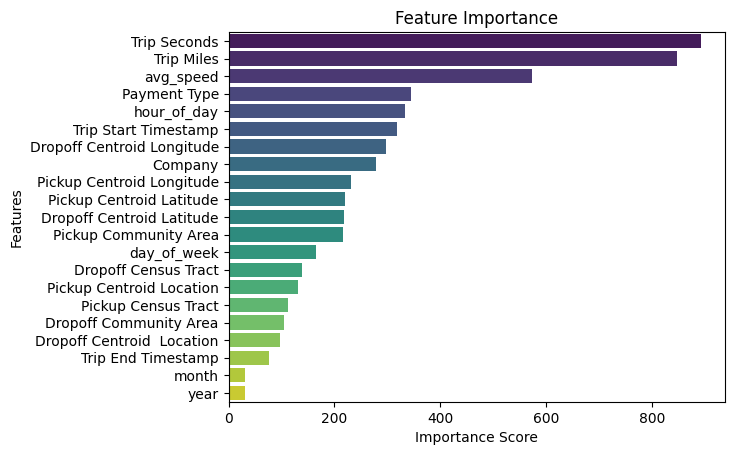

In [ ]:
sns.barplot(x='Importance', y='Feature', data=importance_df.head(50), hue='Feature', palette="viridis", dodge=False, legend=False)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

<br/>

<br/>

# XGBoost Hyperparamter Tuning

In [ ]:
%%time
# RAPIDS OFF  - 270.82 (100), 543.42 (250)
# RAPIDS A100 -             , 14.1(500)(x19)

X = df.drop(columns=["trip_ttl"])
y = df["trip_ttl"]

xgb_fold_results = {"avg": [], "mse": [], "rmse": [], "mae": [], "r2": [], "max_err": []}

for fold, (train_index, test_index) in enumerate(KFold(n_splits=5, shuffle=True, random_state=42).split(df)):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # train
  xgb_model = xgb.XGBRegressor(device=xgb_device,
                               n_estimators=500,
                               learning_rate=0.05,
                               max_depth=6,
                               eval_metric="mae",
                               objective="reg:gamma",
                               min_child_weight=5
  )
  # xgb_model = xgb.XGBRegressor(device=xgb_device)

  xgb_model.fit(X_train, y_train)
  y_pred = xgb_model.predict(X_test)
  xgb_fold_results["avg"].append(y_pred.mean())

  # metrics
  mse = ((y_test - y_pred) ** 2).mean()
  xgb_fold_results["mse"].append(mse)
  xgb_fold_results["rmse"].append(mse ** 0.5)
  mae = (y_test - y_pred).abs().mean()
  xgb_fold_results["mae"].append(mae)
  ss_residual = ((y_test - y_pred) ** 2).sum()
  ss_total = ((y_test - y_test.mean()) ** 2).sum()
  r_squared = 1 - (ss_residual / ss_total)
  xgb_fold_results["r2"].append(1 - (ss_residual / ss_total))
  xgb_fold_results["max_err"].append((y_test - y_pred).abs().max())

CPU times: user 13.9 s, sys: 1.94 s, total: 15.8 s
Wall time: 14.5 s


In [ ]:
xgb_tuned_fold_results_df = pd.DataFrame(xgb_fold_results)
xgb_tuned_results_df = pd.DataFrame({'model': 'xgb_tuned',**xgb_tuned_fold_results_df.drop(columns=['max_err']).mean(), 'max_err': xgb_tuned_fold_results_df['max_err'].max()}, index=[0])

all_results = pd.concat([mean_results_df, median_results_df, xgb_naïve_results_df, xgb_fe_results_df, xgb_tuned_results_df])[["model", "mae", "rmse", "mse", "r2", "max_err", "avg"]]
all_results.sort_values(by=["mae", "mse", "rmse", "r2", "max_err"], ascending=[True, True, True, False, True]).round(3)

,model,mae,rmse,mse,r2,max_err,avg
0,xgb_tuned,0.692,1.051,1.105,0.945,23.547,10.080
0,xgb_fe,0.698,1.056,1.115,0.944,28.065,10.084
0,xgb_naïve,5.157,83.868,7055.597,0.125,9788.077,17.581
0,median,10.521,90.078,8145.749,-0.008,9965.570,9.750
0,mean,13.394,89.736,8084.466,-0.000,9957.770,17.579


<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

# x20 Performance Boost - All Code

### RAPIDS OFF

In [ ]:
226.7 / 10

22.669999999999998

### RAPIDS ON A100

In [ ]:
10

<br/>

In [ ]:
!cp /content/drive/MyDrive/Taxi_Trips__2013-2023__20241218.csv .

In [ ]:
xgb_device = "cpu"

# %load_ext cudf.pandas
# xgb_device = "cuda"

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [ ]:
start = time()
# RAPIDS OFF  - 243.32
# RAPIDS A100 - 9.91

#----------MEAN/MEDIAN DATA PREP--------------#
df = pd.read_csv('Taxi_Trips__2013-2023__20241218.csv')  # read in data
df = df.rename(columns={'Trip Total': 'trip_ttl'})  # abbreviate target column name
df = df[df["trip_ttl"]>0]

df = df.sample(frac=1, random_state=42).reset_index(drop=True)
split_index = int(0.8 * len(df))  # 80% train, 20% test
train_df = df[:split_index]
test_df = df[split_index:]
del df

X_test = test_df.drop(columns=["trip_ttl"])
y_test = test_df["trip_ttl"]

X_train = train_df.drop(columns=["trip_ttl"])
y_train = train_df["trip_ttl"]

#----------MEAN--------------#
mean_fold_results = {"avg":[], "mse": [], "rmse": [], "mae": [], "r2": [], "max_err": []}


y_pred = y_train.mean()
mean_fold_results["avg"].append(y_pred)

mse = ((y_test - y_pred) ** 2).mean()
mean_fold_results["mse"].append(mse)
mean_fold_results["rmse"].append(mse  ** 0.5)
mae = (y_test - y_pred).abs().mean()
mean_fold_results["mae"].append(mae)
ss_residual = ((y_test - y_pred) ** 2).sum()
ss_total = ((y_test - y_test.mean()) ** 2).sum()
r_squared = 1 - (ss_residual / ss_total)
mean_fold_results["r2"].append(1 - (ss_residual / ss_total))
mean_fold_results["max_err"].append((y_test - y_pred).abs().max())


#----------MEDIAN--------------#
median_fold_results = {"avg":[], "mse": [], "rmse": [], "mae": [], "r2": [], "max_err": []}

y_pred = y_train.median()
median_fold_results["avg"].append(y_pred)

mse = ((y_test - y_pred) ** 2).mean()
median_fold_results["mse"].append(mse)
median_fold_results["rmse"].append(mse ** 0.5)
mae = (y_test - y_pred).abs().mean()
median_fold_results["mae"].append(mae)
ss_residual = ((y_test - y_pred) ** 2).sum()
ss_total = ((y_test - y_test.mean()) ** 2).sum()
r_squared = 1 - (ss_residual / ss_total)
median_fold_results["r2"].append(1 - (ss_residual / ss_total))
median_fold_results["max_err"].append((y_test - y_pred).abs().max())


#---------------------XGB NAIVE DATA PREP---------------------#
df = pd.read_csv('Taxi_Trips__2013-2023__20241218.csv')  # read in data
df = df.rename(columns={'Trip Total': 'trip_ttl'})  # abbreviate target column name
df = df[df["trip_ttl"]>0]
_ = df.sort_values(["trip_ttl"], ascending=False)[["trip_ttl", "Trip Seconds", "Trip Miles"]]

df = df.drop(columns=["Fare", "Tips", "Tolls", "Extras"])
df = df.drop(columns=["Trip ID", "Taxi ID", "Pickup Centroid Location", "Dropoff Centroid  Location", "Payment Type", "Company"])

df["Trip Start Timestamp"] = pd.to_datetime(df["Trip Start Timestamp"], format="%m/%d/%Y %I:%M:%S %p")
df["Trip End Timestamp"] = pd.to_datetime(df["Trip End Timestamp"], format="%m/%d/%Y %I:%M:%S %p")
df["Trip Start Timestamp"] = (df["Trip Start Timestamp"] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
df["Trip End Timestamp"] = (df["Trip End Timestamp"] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df = df.sample(frac=1, random_state=42).reset_index(drop=True)
split_index = int(0.8 * len(df))  # 80% train, 20% test
train_df = df[:split_index]
test_df = df[split_index:]
del df

X_test = test_df.drop(columns=["trip_ttl"])
y_test = test_df["trip_ttl"]

X_train = train_df.drop(columns=["trip_ttl"])
y_train = train_df["trip_ttl"]


#----------------XGB NAIVE-------------------#
xgb_naive_fold_results = {"avg": [], "mse": [], "rmse": [], "mae": [], "r2": [], "max_err": []}


# train
xgb_model = xgb.XGBRegressor(device=xgb_device)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
xgb_naive_fold_results["avg"].append(y_pred.mean())

# metrics
mse = ((y_test - y_pred) ** 2).mean()
xgb_naive_fold_results["mse"].append(mse)
xgb_naive_fold_results["rmse"].append(mse ** 0.5)
mae = (y_test - y_pred).abs().mean()
xgb_naive_fold_results["mae"].append(mae)
ss_residual = ((y_test - y_pred) ** 2).sum()
ss_total = ((y_test - y_test.mean()) ** 2).sum()
r_squared = 1 - (ss_residual / ss_total)
xgb_naive_fold_results["r2"].append(1 - (ss_residual / ss_total))
xgb_naive_fold_results["max_err"].append((y_test - y_pred).abs().max())


#----------------------XGB FEATURE ENGINEERING - DATA PREP-----------------------#
df = pd.read_csv('Taxi_Trips__2013-2023__20241218.csv')  # read in data
df = df.rename(columns={'Trip Total': 'trip_ttl'})  # abbreviate target column name
df = df.drop(columns=["Fare", "Tips", "Tolls", "Extras"])
df = df.drop(columns=["Trip ID", "Taxi ID"])

df["Trip Start Timestamp"] = pd.to_datetime(df["Trip Start Timestamp"], format="%m/%d/%Y %I:%M:%S %p")
df["Trip End Timestamp"] = pd.to_datetime(df["Trip End Timestamp"], format="%m/%d/%Y %I:%M:%S %p")

df = df[df["trip_ttl"]>0]
_ = df.nunique().sort_values()

target = ["trip_ttl"]
num_cols = ["Pickup Centroid Latitude", "Pickup Centroid Longitude", "Dropoff Centroid Latitude", "Dropoff Centroid Longitude", "Trip Miles", "Trip Seconds", "Trip Start Timestamp", "Trip End Timestamp"]
cat_cols = list(set(df.columns) - set(target + num_cols))

for col in num_cols:
  df[col] = df[col].fillna(df[col].mean())

df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

df.sort_values(["trip_ttl", "Trip Seconds", "Trip Miles"], ascending=False)[["trip_ttl", "Trip Seconds", "Trip Miles", "Payment Type"]]

df = df[(df['Trip Seconds'] * df['Trip Miles']) > 0]

def filter_by_modified_z_score(df, column, threshold=4.0):
    # median and MAD (median abs deviation)
    median = df[column].median()
    mad = (df[column] - median).abs().median()
    return df[(0.6745 * (df[column] - median) / mad).abs() <= threshold]

df = filter_by_modified_z_score(df, "trip_ttl", threshold=3.5)
_ = df.sort_values(["trip_ttl", "Trip Seconds", "Trip Miles"], ascending=False)[["trip_ttl", "Trip Seconds", "Trip Miles"]]

### Feature Extraction

df['avg_speed'] = df['Trip Miles'] / (df['Trip Seconds'] / 3600)
num_cols.append('avg_speed')

df['day_of_week'] = df['Trip Start Timestamp'].dt.dayofweek
df['hour_of_day'] = df['Trip Start Timestamp'].dt.hour
df['month'] = df['Trip Start Timestamp'].dt.month
df['year'] = df['Trip Start Timestamp'].dt.year
cat_cols.extend(['day_of_week', 'hour_of_day', 'month', 'year'])

# convert to timestamp seconds since epoch
df['Trip Start Timestamp'] = df['Trip Start Timestamp'].astype(int) // 10**9
df['Trip End Timestamp'] = df['Trip End Timestamp'].astype(int) // 10**9

num_cols.extend(['Trip Start Timestamp', 'Trip End Timestamp'])

for col in cat_cols:
  df[col] = df[col].map(df.groupby(col)["trip_ttl"].mean())

_ = df.sort_values("trip_ttl", ascending=False)

df = df.replace([np.inf, -np.inf], np.nan).dropna()

df = df.sample(frac=1, random_state=42).reset_index(drop=True)
split_index = int(0.8 * len(df))  # 80% train, 20% test
train_df = df[:split_index]
test_df = df[split_index:]
del df

X_test = test_df.drop(columns=["trip_ttl"])
y_test = test_df["trip_ttl"]

X_train = train_df.drop(columns=["trip_ttl"])
y_train = train_df["trip_ttl"]


#--------------------XGB FE----------------------------#
xgb_fe_fold_results = {"avg": [], "mse": [], "rmse": [], "mae": [], "r2": [], "max_err": []}

# train
xgb_model = xgb.XGBRegressor(device=xgb_device)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
xgb_fe_fold_results["avg"].append(y_pred.mean())

# metrics
mse = ((y_test - y_pred) ** 2).mean()
xgb_fe_fold_results["mse"].append(mse)
xgb_fe_fold_results["rmse"].append(mse ** 0.5)
mae = (y_test - y_pred).abs().mean()
xgb_fe_fold_results["mae"].append(mae)
ss_residual = ((y_test - y_pred) ** 2).sum()
ss_total = ((y_test - y_test.mean()) ** 2).sum()
r_squared = 1 - (ss_residual / ss_total)
xgb_fe_fold_results["r2"].append(1 - (ss_residual / ss_total))
xgb_fe_fold_results["max_err"].append((y_test - y_pred).abs().max())


#--------------XGB HYPERPARAMETER TUNING--------------#
xgb_tune_fold_results = {"avg": [], "mse": [], "rmse": [], "mae": [], "r2": [], "max_err": []}

# train
xgb_model = xgb.XGBRegressor(device=xgb_device,
                              n_estimators=500,
                              learning_rate=0.05,
                              max_depth=6,
                              eval_metric="mae",
                              objective="reg:gamma",
                              min_child_weight=5
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
xgb_tune_fold_results["avg"].append(y_pred.mean())

mse = ((y_test - y_pred) ** 2).mean()
xgb_tune_fold_results["mse"].append(mse)
xgb_tune_fold_results["rmse"].append(mse ** 0.5)
mae = (y_test - y_pred).abs().mean()
xgb_tune_fold_results["mae"].append(mae)
ss_residual = ((y_test - y_pred) ** 2).sum()
ss_total = ((y_test - y_test.mean()) ** 2).sum()
r_squared = 1 - (ss_residual / ss_total)
xgb_tune_fold_results["r2"].append(1 - (ss_residual / ss_total))
xgb_tune_fold_results["max_err"].append((y_test - y_pred).abs().max())

time() - start

226.7055914402008

<br/>

<br/>

<br/>

<br/>

### results

In [ ]:
del xgb_fold_results

In [ ]:
mean_fold_results_df = pd.DataFrame(mean_fold_results)
mean_results_df = pd.DataFrame({'model': 'mean',**mean_fold_results_df.drop(columns=['max_err']).mean(), 'max_err': mean_fold_results_df['max_err'].max()}, index=[0])

median_fold_results_df = pd.DataFrame(median_fold_results)
median_results_df = pd.DataFrame({'model': 'median', **median_fold_results_df.drop(columns=['max_err']).mean(), 'max_err': median_fold_results_df['max_err'].max()}, index=[0])

xgb_naïve_fold_results_df = pd.DataFrame(xgb_naive_fold_results)
xgb_naïve_results_df = pd.DataFrame({'model': 'xgb_naïve',**xgb_naïve_fold_results_df.drop(columns=['max_err']).mean(), 'max_err': xgb_naïve_fold_results_df['max_err'].max()}, index=[0])

xgb_fe_fold_results_df = pd.DataFrame(xgb_fe_fold_results)
xgb_fe_results_df = pd.DataFrame({'model': 'xgb_fe',**xgb_fe_fold_results_df.drop(columns=['max_err']).mean(), 'max_err': xgb_fe_fold_results_df['max_err'].max()}, index=[0])

xgb_tuned_fold_results_df = pd.DataFrame(xgb_tune_fold_results)
xgb_tuned_results_df = pd.DataFrame({'model': 'xgb_tuned',**xgb_tuned_fold_results_df.drop(columns=['max_err']).mean(), 'max_err': xgb_tuned_fold_results_df['max_err'].max()}, index=[0])

all_results = pd.concat([mean_results_df, median_results_df, xgb_naïve_results_df, xgb_fe_results_df, xgb_tuned_results_df]).sort_values(by=["mae", "mse", "rmse", "r2", "max_err"], ascending=[True, True, True, False, True])

all_results.round(2)

In [ ]:
mean_fold_results_df = pd.DataFrame(mean_fold_results)
mean_results_df = pd.DataFrame({'model': 'mean',**mean_fold_results_df.drop(columns=['max_err']).mean(), 'max_err': mean_fold_results_df['max_err'].max()}, index=[0])

median_fold_results_df = pd.DataFrame(median_fold_results)
median_results_df = pd.DataFrame({'model': 'median', **median_fold_results_df.drop(columns=['max_err']).mean(), 'max_err': median_fold_results_df['max_err'].max()}, index=[0])

xgb_naïve_fold_results_df = pd.DataFrame(xgb_naive_fold_results)
xgb_naïve_results_df = pd.DataFrame({'model': 'xgb_naïve',**xgb_naïve_fold_results_df.drop(columns=['max_err']).mean(), 'max_err': xgb_naïve_fold_results_df['max_err'].max()}, index=[0])

all_results = pd.concat([mean_results_df, median_results_df, xgb_naïve_results_df]).sort_values(by=["mae", "mse", "rmse", "r2", "max_err"], ascending=[True, True, True, False, True])

all_results.round(2)

In [ ]:
melted_df = all_results.melt(id_vars='model', var_name='metric', value_name='value')
filtered_df = melted_df[melted_df['metric'] != 'avg']
unique_metrics = filtered_df['metric'].unique()
n_metrics = len(unique_metrics)
n_cols = 2
n_rows = (n_metrics + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(11, 8))
axes = axes.flatten()

for i, metric in enumerate(unique_metrics):
    ax = axes[i]
    sns.barplot(
        x='model',
        y='value',
        hue='model',  # Assign 'model' to hue
        data=filtered_df[filtered_df['metric'] == metric],
        palette='viridis',
        ax=ax,
        dodge=False)

    ax.set_title(f'Comparison of {metric.upper()}')
    ax.set_ylabel(metric.upper())
    ax.set_xlabel('Model')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
booster = xgb_model.get_booster()
importance = booster.get_score(importance_type='weight')  # You can also use 'gain', 'cover', etc.

# Convert to DataFrame
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette="viridis", dodge=False, legend=False)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

# XGBoost Parameter Tuning

In [ ]:
!pip install -q optuna

In [ ]:
import optuna

In [ ]:
def xgb_params_objective(trial):

  xgb_params = {
      "device": xgb_device,
      "eval_metric": "mae",

      "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),

      "n_estimators": trial.suggest_int("n_estimators", 25, 500),

      "learning_rate": trial.suggest_float("learning_rate", 0.0001, 0.9),

      "objective": trial.suggest_categorical("objective", ["reg:squarederror", "reg:squaredlogerror", "reg:gamma", "reg:tweedie"])
  }

  if xgb_params['booster'] == 'gbtree':
      xgb_params["max_depth"] = trial.suggest_int("max_depth", 1, 10)
      xgb_params["min_child_weight"] = trial.suggest_int("min_child_weight", 1, 10)
      xgb_params["subsample"] = trial.suggest_float("subsample", 0.5, 1.0)
      xgb_params["colsample_bytree"] = trial.suggest_float("colsample_bytree", 0.5, 1.0)

  elif xgb_params['booster'] == 'gblinear':
      xgb_params["alpha"] = trial.suggest_float("alpha", 0, 1)
      xgb_params["lambda"] = trial.suggest_float("lambda", 0, 1)
      xgb_params["feature_selector"] = trial.suggest_categorical("feature_selector", ["cyclic", "shuffle"])

  elif xgb_params['booster'] == 'dart':
      xgb_params["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
      xgb_params["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
      xgb_params["rate_drop"] = trial.suggest_float("rate_drop", 0.0, 1.0)
      xgb_params["skip_drop"] = trial.suggest_float("skip_drop", 0.0, 1.0)

  return xgb_params

In [ ]:
def objective(trial):

  xgb_params = xgb_params_objective(trial)

  xgb_auto_tune_fold_results = {"avg": [], "mse": [], "rmse": [], "mae": [], "r2": [], "max_err": []}

  X = df.drop(columns=["trip_ttl"])
  y = df["trip_ttl"]

  for fold, (train_index, test_index) in enumerate(KFold(n_splits=5, shuffle=True, random_state=42).split(df)):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train
    xgb_model = xgb.XGBRegressor(**xgb_params)

    start = time()
    xgb_model.fit(X_train, y_train)
    fit_time = time() - start
    trial.set_user_attr("fit_time", fit_time)

    y_pred = xgb_model.predict(X_test)
    xgb_auto_tune_fold_results["avg"].append(y_pred.mean())

    # metrics
    mse = ((y_test - y_pred) ** 2).mean()
    xgb_auto_tune_fold_results["mse"].append(mse)

    xgb_auto_tune_fold_results["rmse"].append(mse ** 0.5)

    xgb_auto_tune_fold_results["mae"].append((y_test - y_pred).abs().mean())

    ss_residual = ((y_test - y_pred) ** 2).sum()
    ss_total = ((y_test - y_test.mean()) ** 2).sum()
    xgb_auto_tune_fold_results["r2"].append(1 - (ss_residual / ss_total))

    xgb_auto_tune_fold_results["max_err"].append((y_test - y_pred).abs().max())

  xgb_auto_tune_fold_results_df = pd.DataFrame(xgb_auto_tune_fold_results)
  xgb_auto_tune_results_df = pd.DataFrame({'model': 'xgb_auto_tune',
                                           **xgb_auto_tune_fold_results_df.drop(columns=['max_err']).mean(),
                                           'max_err': xgb_auto_tune_fold_results_df['max_err'].max()}, index=[0])


  return xgb_auto_tune_fold_results_df["mae"].mean()

In [ ]:
study = optuna.create_study(direction="minimize")

In [ ]:
!date
study.optimize(objective, timeout=10)
!date

In [ ]:
!date
study.optimize(objective, timeout=10)
!date